In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import folium
from folium import plugins
import matplotlib.patches as mpatches


cities = pd.read_csv("../data/cities.csv")
cities.rename(columns = {'id': "city_id"}, inplace=True)
cities.sample(10)

,city_id,name,coords,start_year,url_name,country,country_state
22,279,Tarbes,POINT(0.083343464 43.23329002),2018.0,tarbes,France,NaN
88,303,Nevers,POINT(3.166669473 46.98373293),2018.0,nevers,France,NaN
128,85,Nairobi,POINT(36.91666667 -1.416666667),2017.0,nairobi,Kenya,NaN
305,253,Wichita,POINT(-97.28333333 37.71666667),2017.0,wichita,United States,Kan.
69,298,Toulon,POINT(5.918821566 43.13418645),2018.0,toulon,France,NaN
110,316,Amiens,POINT(2.300004027 49.90037661),2018.0,amiens,France,NaN
273,220,Raleigh,POINT(-78.65 35.76666667),2017.0,raleigh,United States,N.C.
249,194,Milwaukee,POINT(-87.91666667 43.03333333),2017.0,milwaukee,United States,Wis.
267,206,New York,POINT(-73.96666667 40.78333333),1832.0,new-york,United States,N.Y.
29,25,Brisbane,POINT(153.1333333 -27.48333333),2017.0,brisbane,Australia,NaN


In [38]:
lines = pd.read_csv("../data/lines.csv")
lines.sample(16)

,id,city_id,name,url_name,color,system_id,transport_mode_id
1325,1454,91,Keishin Line,1454-keishin-line,#aace24,372,5.0
1116,1217,206,6th Avenue Line,1217-sixth-avenue-line,#01ffdd,477,4.0
419,528,29,M2,528-2,#e33248,22,5.0
387,467,67,Cais do Sodré,467-cais-do-sodre,#41026c,317,NaN
747,891,114,Chihara Line,891-chihara-line,#005aaa,308,4.0
51,125,107,Line 7,125-line-7,#ff6900,252,NaN
190,347,266,Ligne 2,347-ligne-2,#000000,295,5.0
685,787,267,A,787-a,#000,345,NaN
974,546,114,Tama Toshi Monorail Line,546-tama-toshi-monorail-line,#ff6633,334,7.0
1076,1081,102,Praça XV–Cocotá,1081-praca-xv–cocota,#4a90e2,396,NaN


In [39]:
station_lines = pd.read_csv('../data/station_lines.csv')
station_lines.sample(16)

,id,station_id,line_id,city_id,created_at,updated_at
15150,8012,4001,342,252,2017-11-21 00:00:00,2017-11-21 00:00:00
7479,8711,9045,796,247,2017-11-27 21:30:22.285568,2017-11-27 21:30:22.285568
11475,15050,14745,1134,139,2018-10-17 20:47:41.368983,2018-10-17 20:47:41.368983
11398,13048,12991,1231,206,2018-09-20 20:26:22.109173,2018-09-20 20:26:22.109173
14924,7786,3820,326,114,2017-11-21 00:00:00,2017-11-21 00:00:00
5699,5845,2644,111,78,2017-11-21 00:00:00,2017-11-21 00:00:00
6965,9579,9923,949,82,2018-01-28 15:43:57.81375,2018-01-28 15:43:57.81375
8438,10878,11052,687,77,2018-03-14 11:11:24.712379,2018-03-14 11:11:24.712379
3766,3875,861,139,69,2017-11-21 00:00:00,2017-11-21 00:00:00
7289,9793,9931,948,82,2018-01-28 16:43:55.523236,2018-01-28 16:43:55.523236


In [40]:
stations = pd.read_csv('../data/stations.csv')
stations[stations['name'] == "Pico"]

,id,name,geometry,buildstart,opening,closure,city_id
476,8567,Pico,POINT(-118.2662644 34.0406307),0.0,0.0,999999.0,189
870,8568,Pico,POINT(-118.2660609 34.0407563),0.0,0.0,999999.0,189
12246,12132,Pico,POINT(-58.4741980951992 -34.5410318797355),2014.0,2015.0,999999.0,1


In [41]:
systems = pd.read_csv('../data/stations.csv')
systems

,id,name,geometry,buildstart,opening,closure,city_id
0,7694,Keisei Tsudanuma,POINT(140.024812197129 35.6837744784723),1921.0,1921.0,999999.0,114
1,6003,Kossuth Lajos tér,POINT(19.0462376564033 47.5054880717671),0.0,0.0,999999.0,29
2,7732,Saint-Charles,POINT(5.3801556 43.3024646),1973.0,1977.0,999999.0,74
3,7695,Keisei Makuhari-Hongo,POINT(140.042146725175 35.6726021159981),1991.0,1991.0,999999.0,114
4,7726,Chartreux,POINT(5.4014815 43.309129),1973.0,1977.0,999999.0,74
...,...,...,...,...,...,...,...
15789,16554,Shinomiya,POINT(135.823937214498 34.9918683039252),1912.0,1912.0,999999.0,91
15790,16555,Keihan Yamashina,POINT(135.816689306704 34.992068923936),1912.0,1912.0,999999.0,91
15791,16556,Hino-oka,POINT(135.799931852138 34.9968986641574),1912.0,1912.0,1997.0,91
15792,16557,Kujoyama,POINT(135.792375683554 35.0018274164674),1936.0,1936.0,1997.0,91


In [42]:
track_lines = pd.read_csv('../data/track_lines.csv')
track_lines

,id,section_id,line_id,created_at,updated_at,city_id
0,2494,1278,343,2017-11-21 00:00:00,2017-11-21 00:00:00,252
1,4124,4477,779,2017-11-21 00:09:55.135507,2017-11-21 00:09:55.135507,63
2,2495,21,9,2017-11-21 00:00:00,2017-11-21 00:00:00,1
3,2496,940,228,2017-11-21 00:00:00,2017-11-21 00:00:00,79
4,4129,4478,793,2017-11-21 17:44:39.765832,2017-11-21 17:44:39.765832,48
...,...,...,...,...,...,...
9752,10699,10530,1611,2019-03-06 22:23:46.008756,2019-03-06 22:23:46.008756,91
9753,10700,10531,1611,2019-03-06 22:27:46.532431,2019-03-06 22:27:46.532431,91
9754,10701,10532,1611,2019-03-06 22:30:58.779519,2019-03-06 22:30:58.779519,91
9755,10702,10533,1610,2019-03-08 21:57:21.68915,2019-03-08 21:57:21.68915,91


In [43]:
tracks = pd.read_csv('../data/tracks.csv')
tracks

,id,geometry,buildstart,opening,closure,length,city_id
0,1911,"LINESTRING(19.0817752 47.5005079,19.0817355 47...",0.0,0.0,999999.0,6719,29
1,2563,"LINESTRING(16.4151057 48.1907238,16.4156455 48...",0.0,0.0,999999.0,199,118
2,2557,"LINESTRING(16.4164437 48.1839655,16.4161534 48...",0.0,0.0,999999.0,925,118
3,2558,"LINESTRING(16.4164901 48.1839473,16.416198 48....",0.0,0.0,999999.0,881,118
4,2564,"LINESTRING(16.415259 48.1908074,16.4153634 48....",0.0,0.0,999999.0,213,118
...,...,...,...,...,...,...,...
9266,9732,"LINESTRING(-3.838067 56.0044551,-3.8385588 56....",0.0,0.0,999999.0,383,48
9267,9734,"LINESTRING(-3.8549229 55.9960854,-3.8544735 55...",0.0,0.0,999999.0,28,48
9268,9735,"LINESTRING(-3.8597111 55.9955538,-3.8572319 55...",0.0,0.0,999999.0,305,48
9269,9736,"LINESTRING(-3.8544735 55.9961285,-3.8529015 55...",0.0,0.0,999999.0,828,48


<BarContainer object of 5 artists>

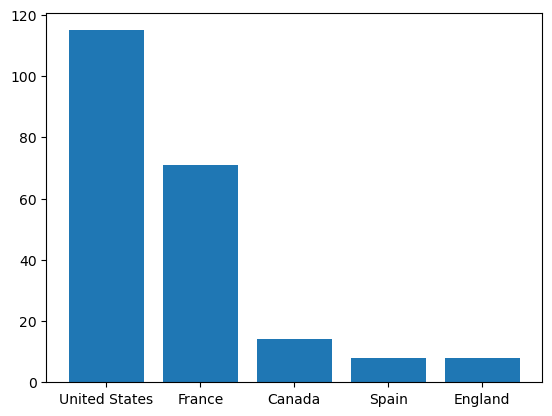

In [44]:
ranked_countries = cities["country"].value_counts().sort_values(ascending=False)

top_five_countries = ranked_countries[0:5]

fig, ax = plt.subplots()

ax.bar(top_five_countries.index, top_five_countries.values)



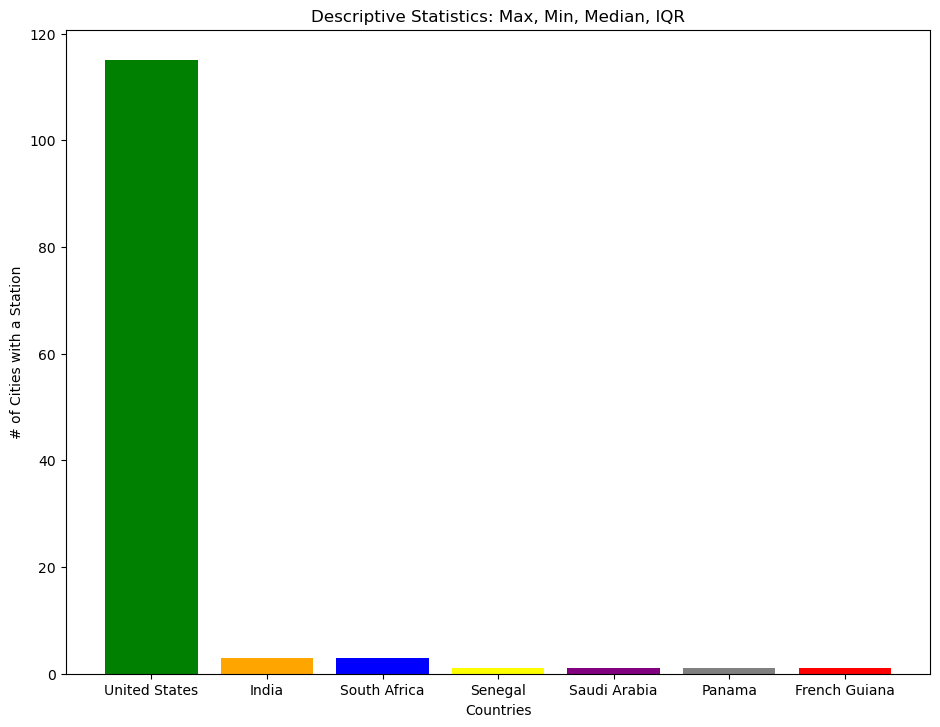

In [45]:


top_country = ranked_countries.max()
top_country_name = ranked_countries.idxmax()

bottom_country = ranked_countries.min()
bottom_country_name = ranked_countries.idxmin()

median_country = ranked_countries.median()
median_country_name = ranked_countries.index[int((len(ranked_countries) -1 ) / 2)]

q3a_country = ranked_countries.iloc[17]
q3a_country_name = ranked_countries.index[17]

q3b_country = ranked_countries.iloc[18]
q3b_country_name = ranked_countries.index[18]


q1a_country = ranked_countries.iloc[-18]
q1a_country_name = ranked_countries.index[-18]

q1b_country = ranked_countries.iloc[-19]
q1b_country_name = ranked_countries.index[-19]

countries = [
    top_country_name, q3a_country_name, 
    q3b_country_name, median_country_name, 
    q1a_country_name, q1b_country_name,
    bottom_country_name]

values = [
    top_country, q3a_country,
    q3b_country, median_country,
    q1a_country, q1b_country,
    bottom_country
]

fig, ax = plt.subplots()
c = ['green', 'orange', 'blue', 'yellow', 'purple', 'grey', 'red']
ax.bar(countries, values, color = c)
ax.set_title("Descriptive Statistics: Max, Min, Median, IQR")
ax.set_ylabel("# of Cities with a Station")
ax.set_xlabel("Countries")
fig.tight_layout()
fig.set_size_inches(10,8)




In [46]:
united_states = cities[cities["country"] == "United States"]

united_states

,city_id,name,coords,start_year,url_name,country,country_state
14,147,Chicago,POINT(-87.61666667 41.83333333),1892.0,chicago,United States,Ill.
163,155,Detroit,POINT(-83.05 42.33333333),2017.0,detroit,United States,Mich.
164,170,Helena,POINT(-112.0333333 46.58333333),2017.0,helena,United States,Mont.
165,214,Pierre,POINT(-100.35 44.36666667),2017.0,pierre,United States,S.D.
180,138,Boise,POINT(-116.2166667 43.6),2017.0,boise,United States,Idaho
...,...,...,...,...,...,...,...
300,248,Tulsa,POINT(-95.98333333 36.15),2017.0,tulsa,United States,Okla.
303,251,Virginia Beach,POINT(-75.96666667 36.85),2017.0,virginia-beach,United States,Va.
305,253,Wichita,POINT(-97.28333333 37.71666667),2017.0,wichita,United States,Kan.
306,254,Wilmington,POINT(-77.95 34.23333333),2017.0,wilmington,United States,N.C.


In [47]:
merged_cities_stations = pd.merge(stations, cities, on='city_id', how='left')
merged_cities_stations_us = merged_cities_stations[merged_cities_stations['country'] == 'United States']
merged_cities_stations_us.sample(10)

,id,name_x,geometry,buildstart,opening,closure,city_id,name_y,coords,start_year,url_name,country,country_state
460,13712,Sands Street,POINT(-73.9909195185139 40.7000028855033),1888.0,1888.0,1940.0,206,New York,POINT(-73.96666667 40.78333333),1832.0,new-york,United States,N.Y.
10094,15000,Highland,POINT(-71.1539709917329 42.2849519843997),1835.0,1835.0,1979.0,139,Boston,POINT(-71.08333333 42.35),1806.0,boston,United States,Mass.
13808,14251,Heller Parkway,POINT(-74.1751854037268 40.7784846788434),1935.0,1935.0,2002.0,206,New York,POINT(-73.96666667 40.78333333),1832.0,new-york,United States,N.Y.
9967,13456,Driggs Avenue,POINT(-73.9622787495557 40.709910486189),1888.0,1888.0,1916.0,206,New York,POINT(-73.96666667 40.78333333),1832.0,new-york,United States,N.Y.
14253,14779,Brandon Hall,POINT(-71.1287560026412 42.3400427772807),1889.0,1889.0,999999.0,139,Boston,POINT(-71.08333333 42.35),1806.0,boston,United States,Mass.
13526,13955,Wall Street,POINT(-74.0091849542762 40.706742186009),1918.0,1918.0,999999.0,206,New York,POINT(-73.96666667 40.78333333),1832.0,new-york,United States,N.Y.
13650,14088,Cortelyou Road,POINT(-73.963959352124 40.6413114756321),1902.0,1902.0,999999.0,206,New York,POINT(-73.96666667 40.78333333),1832.0,new-york,United States,N.Y.
2328,8625,Culver City,POINT(-118.3892187 34.0279557),0.0,0.0,999999.0,189,Los Angeles,POINT(-118.25 34.05),2017.0,los-angeles,United States,Calif.
11001,12987,138th Street-Grand Concourse,POINT(-73.9300466824261 40.8131311538497),1918.0,1918.0,999999.0,206,New York,POINT(-73.96666667 40.78333333),1832.0,new-york,United States,N.Y.
10336,12866,84th Street,POINT(-73.9549263822936 40.7774733552816),1878.0,1878.0,1955.0,206,New York,POINT(-73.96666667 40.78333333),1832.0,new-york,United States,N.Y.


<BarContainer object of 7 artists>

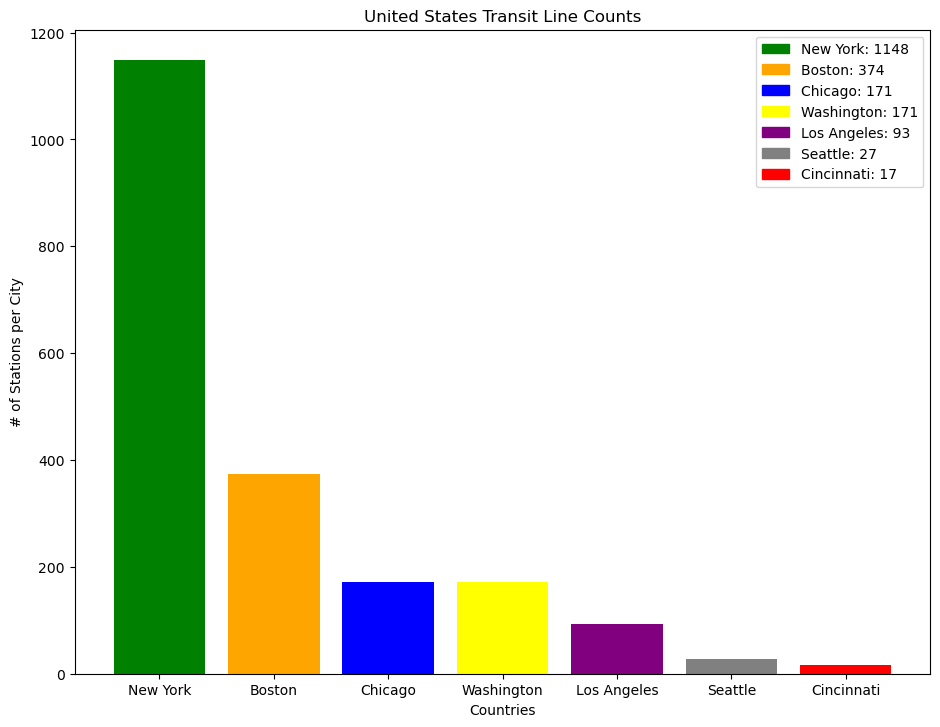

In [62]:
merged_stations_us_by_state = merged_cities_stations_us.value_counts('name_y')
merged_stations_us_by_state

fig, ax = plt.subplots()
ax.set_title("United States Transit Line Counts")
ax.set_ylabel("# of Stations per City")
ax.set_xlabel("Countries")
new_york_legend = mpatches.Patch(color= 'green', label='New York: 1148')
boston_legend = mpatches.Patch(color= 'orange', label='Boston: 374')
chicago_legend = mpatches.Patch(color= 'blue', label='Chicago: 171')
washington_legend = mpatches.Patch(color= 'yellow', label='Washington: 171')
los_angeles_legend = mpatches.Patch(color= 'purple', label='Los Angeles: 93')
seattle_legend = mpatches.Patch(color= 'grey', label='Seattle: 27')
cincinnati_legend = mpatches.Patch(color= 'red', label='Cincinnati: 17')
plt.legend(handles=[new_york_legend, boston_legend, chicago_legend, washington_legend, los_angeles_legend, seattle_legend, cincinnati_legend ])
#ax.legend(["1148", "374", "171", "171", "93", "27", "17"])
fig.tight_layout()
fig.set_size_inches(10,8)
c = ['green', 'orange', 'blue', 'yellow', 'purple', 'grey', 'red']
ax.bar(merged_stations_us_by_state.index, merged_stations_us_by_state.values, color = c)

In [49]:
stations

,id,name,geometry,buildstart,opening,closure,city_id
0,7694,Keisei Tsudanuma,POINT(140.024812197129 35.6837744784723),1921.0,1921.0,999999.0,114
1,6003,Kossuth Lajos tér,POINT(19.0462376564033 47.5054880717671),0.0,0.0,999999.0,29
2,7732,Saint-Charles,POINT(5.3801556 43.3024646),1973.0,1977.0,999999.0,74
3,7695,Keisei Makuhari-Hongo,POINT(140.042146725175 35.6726021159981),1991.0,1991.0,999999.0,114
4,7726,Chartreux,POINT(5.4014815 43.309129),1973.0,1977.0,999999.0,74
...,...,...,...,...,...,...,...
15789,16554,Shinomiya,POINT(135.823937214498 34.9918683039252),1912.0,1912.0,999999.0,91
15790,16555,Keihan Yamashina,POINT(135.816689306704 34.992068923936),1912.0,1912.0,999999.0,91
15791,16556,Hino-oka,POINT(135.799931852138 34.9968986641574),1912.0,1912.0,1997.0,91
15792,16557,Kujoyama,POINT(135.792375683554 35.0018274164674),1936.0,1936.0,1997.0,91


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


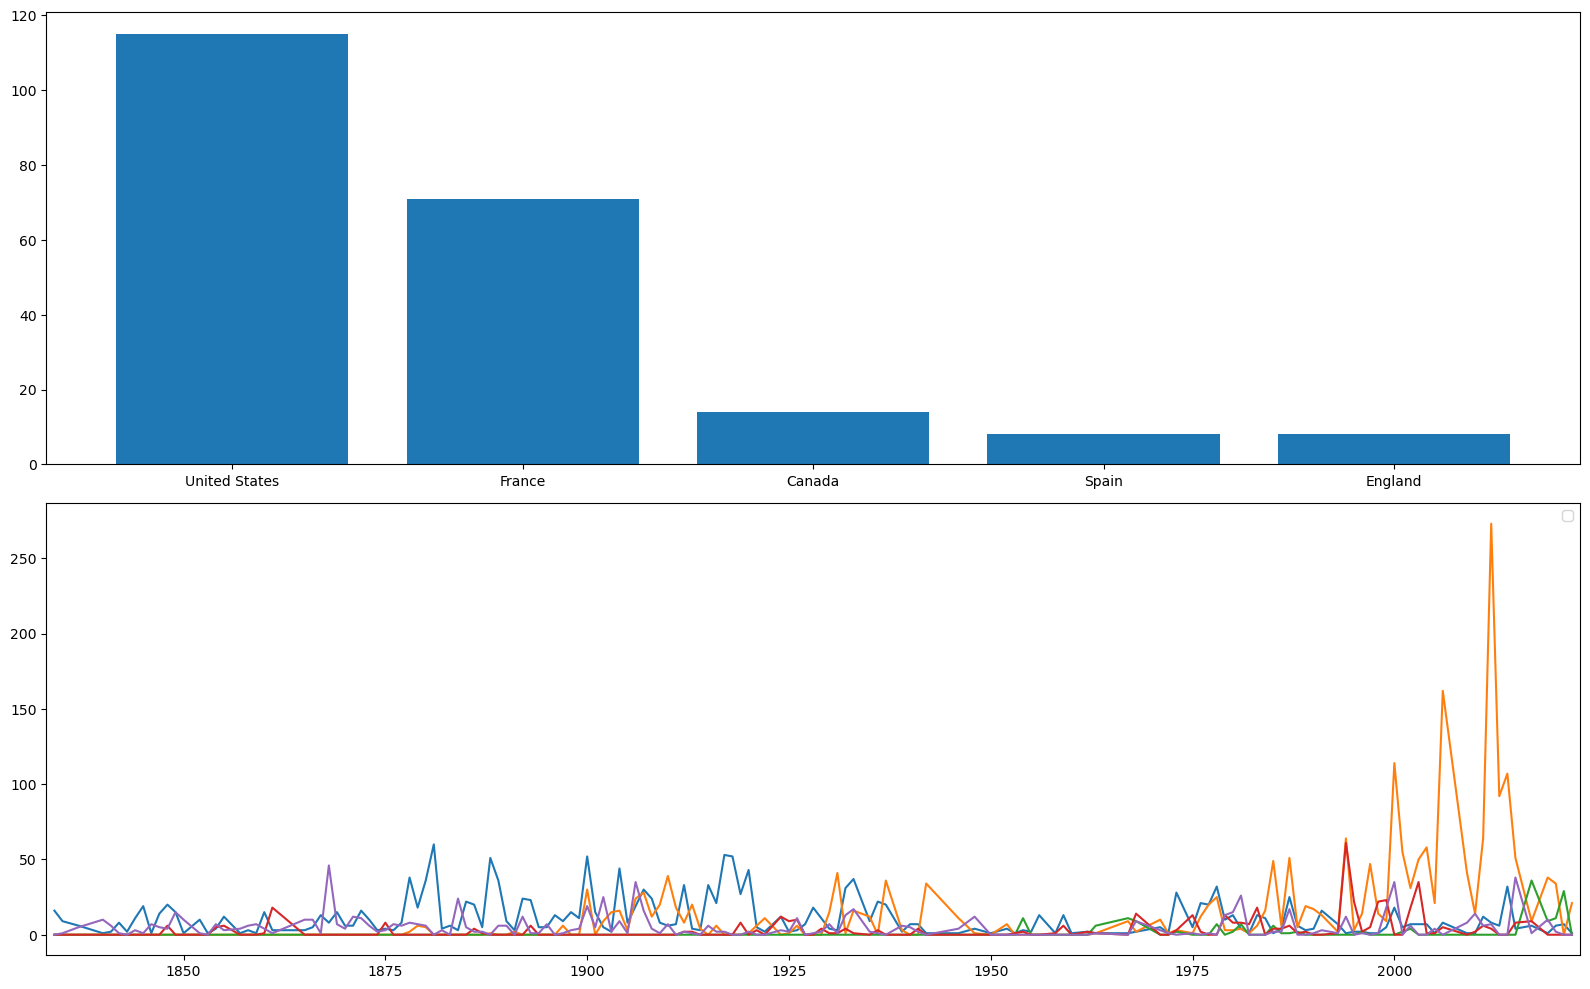

In [50]:
merged_cities_stations.sample(10)

def openings_years_per_country(df, country1, country2, country3, country4, country5):
    openings_per_country_df = pd.DataFrame()
    openings_per_country_df[country1] = df[(df['country'] == country1) & (df['opening'] > 0)].value_counts('opening')
    openings_per_country_df[country2] = df[(df['country'] == country2) & (df['opening'] > 0)].value_counts('opening')
    openings_per_country_df[country3] = df[(df['country'] == country3) & (df['opening'] > 0)].value_counts('opening')
    openings_per_country_df[country4] = df[(df['country'] == country4) & (df['opening'] > 0)].value_counts('opening')
    openings_per_country_df[country5] = df[(df['country'] == country5) & (df['opening'] > 0)].value_counts('opening')

    openings_per_country_df[[country1, country2, country3, country4, country5]] = \
        openings_per_country_df[[country1, country2, country3, country4, country5]].fillna(0)

    return openings_per_country_df.sort_index()


openings_per_country_df = openings_years_per_country(merged_cities_stations, 'United States', "France", 'Canada', 'Spain', 'England')

fig, axs = plt.subplots(2,1)

axs[1].plot(openings_per_country_df)
axs[1].set_xlim(1833, 2023)
axs[1].legend()
axs[0].bar(top_five_countries.index, top_five_countries.values)
fig.set_size_inches(16, 10)
fig.tight_layout()



In [51]:
us_station_map = merged_cities_stations_us[['name_x', 'geometry', 'name_y']]
us_station_map.rename(columns={'name_x':'station', 'name_y':'city'}, inplace=True)
us_station_map['lat'] = us_station_map['geometry'].apply(lambda x: x.split("POINT(")[1].split(" ")[1].split(")")[0])
us_station_map['long'] = us_station_map['geometry'].apply(lambda x: x.split("POINT(")[1].split(" ")[0])
us_station_map



C:\Users\muscl\AppData\Local\Temp\ipykernel_7576\33158620.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  us_station_map.rename(columns={'name_x':'station', 'name_y':'city'}, inplace=True)
C:\Users\muscl\AppData\Local\Temp\ipykernel_7576\33158620.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  us_station_map['lat'] = us_station_map['geometry'].apply(lambda x: x.split("POINT(")[1].split(" ")[1].split(")")[0])
C:\Users\muscl\AppData\Local\Temp\ipykernel_7576\33158620.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

,station,geometry,city,lat,long
351,Sands Street,POINT(-73.9900595885681 40.6999957881726),New York,40.6999957881726,-73.9900595885681
460,Sands Street,POINT(-73.9909195185139 40.7000028855033),New York,40.7000028855033,-73.9909195185139
461,7th Street/Metro Center,POINT(-118.2586637 34.0486686),Los Angeles,34.0486686,-118.2586637
476,Pico,POINT(-118.2662644 34.0406307),Los Angeles,34.0406307,-118.2662644
524,Franklin Avenue,POINT(-73.9558290151206 40.6809373893361),New York,40.6809373893361,-73.9558290151206
...,...,...,...,...,...
15448,West Edge,POINT(-122.336763227539 47.6058839076996),Seattle,47.6058839076996,-122.336763227539
15449,South Lake Union-Seattle Center,POINT(-122.343234884068 47.6203175414603),Seattle,47.6203175414603,-122.343234884068
15503,Friendship Heights,POINT(-77.0854410365934 38.9615399698817),Washington,38.9615399698817,-77.0854410365934
15504,Wisconsin Ave @ Jenifer,POINT(-77.0848162794167 38.9591131645103),Washington,38.9591131645103,-77.0848162794167


In [52]:


map_us=folium.Map()

us_stations=pd.DataFrame({"lat":us_station_map['lat'],"long":us_station_map['long']})

map_us.add_child(plugins.HeatMap(data=us_stations))

map_us